#  **Desarrollo Prueba # 2**

## *Contenido*
1. Limpieza y adición de nuevas columnas
2. Extracción dominio correo electrónico y validación
3. Extracción de los datos solicitados usando el fitro *Notificar Encargado* y *Notificar Gerente*
4. Envio correos destinatario *gerente* con la información requerida
5. Envio correos destinatario *encargado* con la información requerida
6. Creación archivos de extensión csv usando el filtros  *Validación de prueba*, *Notificar Gerente*, *Notificar Encargado*
7. Asignación variables para realizar gráfico de análisis
8. Realización gráfico de análisis
9. Realización gráfico de análisis tiempos de ejecución tareas a realizar

#### 1. Limpieza y adición de nuevas columnas

In [12]:
import csv
import pandas as pd 
import numpy as np

datos = pd.read_csv('Datos2.csv')
datos["Total"]=datos['Total'].str.replace('$','')
datos["Total"]= pd.to_numeric(datos["Total"], downcast='float')



     

C:\Users\Niko\AppData\Local\Temp\ipykernel_21216\176272137.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos["Total"]=datos['Total'].str.replace('$','')


In [13]:
datos["Notificar Gerente"] = np.where(datos["Total"]>80.8, 'Yes', 'No')
#datos.info()

datos["Código postal"] = datos["Código postal"].str.replace('[A-Z]','',regex=True)
datos["Código postal"] = datos["Código postal"].str.replace('[\.-]','',regex=True)
datos["Código postal"] = datos["Código postal"].str.replace(' ','',regex=True)
datos["Código de recepción"] = datos["Código postal"] + datos["Token"]
datos["Envío"] = np.where(datos["País"]== 'United States', 'Local', 'Internacional')

datos.head(50)

,Nombre,Teléfono,Correo,Dirección,Marca,País,Código postal,Repuestos,Total,Token,Prueba,Notifica encargado,Día,Notificar Gerente,Código de recepción,Envío
0,Vernon Garrett,(231) 112-5947,mauris.molestie.pharetra@aol.edu,Ap #978-2455 In St.,Audi,Nigeria,25479,9,79.260002,NPG63BRS6RK,Yes,No,03/25/2022,No,25479NPG63BRS6RK,Internacional
1,Aiko Allison,1-283-566-3643,ad.litora.torquent@google.couk,285-172 Nisi Av.,Renault,Ukraine,985738,8,34.389999,SIS83HFS2QG,Yes,No,01/31/2022,No,985738SIS83HFS2QG,Internacional
2,Orli Nolan,1-793-831-5687,dui@protonmail.com,441-9227 Senectus Road,Ferrari,Colombia,308900,1,78.489998,RYH12OMN7ES,No,Yes,04/07/2022,No,308900RYH12OMN7ES,Internacional
3,Rafael Weeks,1-730-836-7845,metus.urna@icloud.ca,838-7417 Nullam Avenue,Ford,Italy,426,2,48.849998,QDJ16YUR5FK,No,No,05/21/2023,No,426QDJ16YUR5FK,Internacional
4,Kasimir Clements,(865) 456-6315,dapibus.id@yahoo.ca,"P.O. Box 146, 156 Aliquet. Av.",BMW,Spain,390446,5,83.190002,BMK12EDR6HQ,Yes,Yes,08/12/2022,Yes,390446BMK12EDR6HQ,Internacional
5,Prescott Howard,(631) 837-8322,est.nunc@yahoo.edu,4207 Malesuada Av.,Audi,Nigeria,274456,3,77.430000,PHL59BFP8EJ,Yes,No,12/26/2022,No,274456PHL59BFP8EJ,Internacional
6,Chandler Flynn,1-738-335-3282,tempor.diam@hotmail.couk,"Ap #147-5507 Nec, Road",Mazda,Peru,48184,4,24.129999,CIB68YCQ2CL,Yes,No,06/12/2023,No,48184CIB68YCQ2CL,Internacional
7,Rafael Riggs,(571) 486-8764,egestas@protonmail.org,"P.O. Box 983, 9742 Arcu Rd.",Audi,Ireland,894136,2,69.480003,FTL32LBB3DO,No,No,01/25/2022,No,894136FTL32LBB3DO,Internacional
8,Seth Mann,1-442-548-6803,aliquet.vel@protonmail.org,8537 Vulputate Ave,Volvo,Mexico,05659,7,55.520000,SNH86RDX5TE,No,Yes,03/05/2023,No,05659SNH86RDX5TE,Internacional
9,Fritz Richmond,1-334-734-6116,phasellus.elit.pede@hotmail.org,548-5074 Id Rd.,Honda,Turkey,271587,9,1.200000,TGO71MUK6FV,No,No,04/08/2022,No,271587TGO71MUK6FV,Internacional


#### 2. Extracción dominio correo electrónico y validación

In [14]:
def dominio(valor):
       if 'novalido' in valor:
              return ''
       p_arroba=valor.find('@')
       dir = valor[p_arroba+1:]
       p_punto=dir.find('.')
       #print(valor[p_arroba+1:].find('.'))
        
       return dir[:p_punto]

In [15]:
datos['Dominio']=datos["Correo"].agg(dominio)
#datos.head(50)

#### 3. Extracción de los datos solicitados usando el fitro *Notificar Encargado* y *Notificar Gerente*

In [16]:
df_no_prueba=datos.loc[datos['Prueba'] == 'No']
gerente =df_no_prueba.loc[df_no_prueba['Notificar Gerente'] == 'Yes']
encargado =df_no_prueba.loc[df_no_prueba['Notifica encargado'] == 'Yes']


#### 4. Envio correos destinatario *gerente* con la información requerida

In [17]:
# import necessary packages
 
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import smtplib
 
dircor = input("Por favor ingrese su correo: ")
contrasena = input("Por favor ingrese el contraseña: ")
destino = input("Por favor ingrese el destinatario (Gerente): ")

 
 
for i in range(3):
    # create message object instance
    msg = MIMEMultipart()
    # setup the parameters of the message
    password = contrasena 
    msg['From'] = dircor 
    msg['To'] = destino 
    msg['Subject'] = f"Notificación importante sobre Pedido {gerente['Código de recepción'].iloc[i]} {gerente['Día'].iloc[i]}"
    #create server
    server = smtplib.SMTP('smtp.gmail.com: 587')
    
    server.starttls()
    
    # Login Credentials for sending the mail
    server.login(msg['From'], password)
    cadena = "Estimado Gerente, "
    cadena += "\n\n"
    cadena += f"\nRemito información sobre el pedido {gerente['Código de recepción'].iloc[i]} que requiere una alta atención por parte de la gerencia solicitado el día {gerente['Día'].iloc[i]}"
    cadena += f"\nNombre del cliente: {gerente['Nombre'].iloc[i]}"
    cadena += f"\nTeléfono del cliente: {gerente['Teléfono'].iloc[i]}"
    cadena += f"\nPedido: {gerente['Código de recepción'].iloc[i]}"
    cadena += f"\nTotal: {gerente['Total'].iloc[i]}"
    cadena += "\nSaludos\n"
    # add in the message body
    msg.attach(MIMEText(cadena, 'plain'))
    # send the message via the server.
    server.sendmail(msg['From'], msg['To'], msg.as_string())
    server.quit()
 
    print(f"successfully sent email to %s:  {(msg['To'])}")
 


successfully sent email to %s:  nikolaifan36@gmail.com
successfully sent email to %s:  nikolaifan36@gmail.com
successfully sent email to %s:  nikolaifan36@gmail.com


#### 5. Envio correos destinatario *encargado* con la información requerida

In [18]:
# import necessary packages
 
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import smtplib

dircor = input("Por favor ingrese su correo: ")
contrasena = input("Por favor ingrese el contraseña: ")
destino = input("Por favor ingrese el destinatario (Encargado): ")

correos =[]
direcciones =[]
marcas =[]
envios1 =[]
codepos = []
repuestos = []
dominios = []
 
for i in [0,1,2]:
    # create message object instance
    msg = MIMEMultipart()
    # setup the parameters of the message
    password = contrasena 
    msg['From'] = dircor 
    msg['To'] = destino 
    msg['Subject'] = f"Notificación importante sobre Pedido {encargado['Código de recepción'].iloc[i]} {encargado['Día'].iloc[i]}"
    #create server
    server = smtplib.SMTP('smtp.gmail.com: 587')
    
    server.starttls()
    
    # Login Credentials for sending the mail
    server.login(msg['From'], password)
    cadena1 = "Cordial saludo señor Pedro Pablo Mendoza"
    cadena1 += "\n"
    cadena1 += f"\nDe acuerdo a lo solicitado por usted, envío la información requerida sobre el pedido {encargado['Código de recepción'].iloc[i]} "
    cadena1 += f"\nNombre del cliente: {encargado['Nombre'].iloc[i]}"
    cadena1 += f"\nTeléfono del cliente: {encargado['Teléfono'].iloc[i]}"
    cadena1 += f"\nCorreo del cliente: {encargado['Correo'].iloc[i]}"
    cadena1 += f"\nDirección del cliente: {encargado['Dirección'].iloc[i]}"
    cadena1 += f"\n Dominio Correo: {encargado['Dominio'].iloc[i]}"
    cadena1 += f"\nMarca: {encargado['Marca'].iloc[i]}"
    cadena1 += f"\nTipo de envio: {encargado['Envío'].iloc[i]}"
    cadena1 += f"\nCodigo postal : {encargado['Código postal'].iloc[i]}"
    cadena1 += f"\nRepuestos: {encargado['Repuestos'].iloc[i]}"
    cadena1 += "\nSaludos\n"
    # add in the message body
    msg.attach(MIMEText(cadena, 'plain'))
    # send the message via the server.
    server.sendmail(msg['From'], msg['To'], msg.as_string())
    server.quit()
 
    print(f"successfully sent email to %s:  {(msg['To'])}")
 


successfully sent email to %s:  nikolaifan36@gmail.com
successfully sent email to %s:  nikolaifan36@gmail.com
successfully sent email to %s:  nikolaifan36@gmail.com


#### 6. Creación archivos de extensión csv usando el filtros  *Validación de prueba*, *Notificar Gerente*, *Notificar Encargado*


In [19]:
df_no_prueba.to_csv('Verificacion.csv',index=False)
encargado.to_csv('Enviosencargado.csv',index=False)
gerente.to_csv('Enviosgerente.csv',index=False)
datos.to_csv('Actualizacion.csv',index=False)




#### 7. Asignación variables para realizar gráfico de análisis

In [20]:
#datos["Prueba"].count()
#datos[datos["Prueba"]== "No"].count()
#datos['Envío'].plot(kind = 'hist')
import matplotlib.pyplot as plt

datos_no=datos['Prueba'][datos["Prueba"]== "No"].count()
datos_si=datos['Prueba'][datos["Prueba"]== "Yes"].count()
datos_local=datos['Envío'][datos["Envío"]== "Local"].count()
datos_internacio=datos['Envío'][datos["Envío"]== "Internacional"].count()
notifaenca_si =datos['Notifica encargado'][datos["Notifica encargado"]== "Yes"].count()
notifaenca_no =datos['Notifica encargado'][datos["Notifica encargado"]== "No"].count()
notifager_si =datos['Notificar Gerente'][datos["Notificar Gerente"]== "Yes"].count()
notifager_no =datos['Notificar Gerente'][datos["Notificar Gerente"]== "No"].count()

ejex = ['Prueba(NO)','Prueba(SI)','Local', 'Envío(Internacional)', 'Envío(Notificar Encargado)','No Notificar Encargado', 'Notificar Gerente', 'No Notificar Gerente']
ejey = [datos_no,datos_si,datos_local, datos_internacio,notifaenca_si,notifaenca_no,notifager_si, notifager_no]
# Figure Size
#fig, ax = plt.subplots(figsize =(16, 9))
#plt.bar(['NO','SI'], [datos_no,datos_si], width = 0.4)

#### 8. Realización gráfico de análisis

C:\Users\Niko\AppData\Local\Temp\ipykernel_21216\3690768598.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='black',


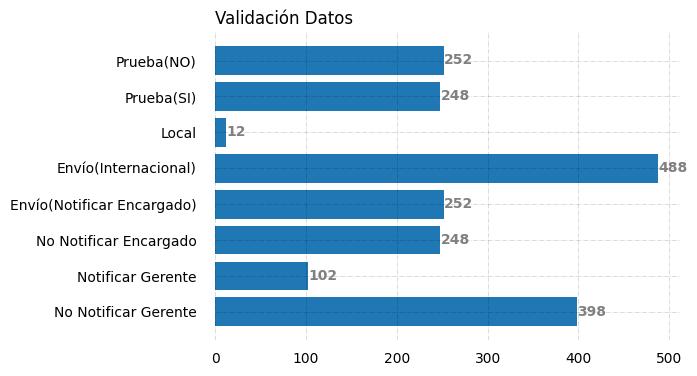

In [21]:

# Figure Size
fig, ax = plt.subplots(figsize =(6, 4))
 
# Horizontal Bar Plot
#ax.barh(['NO','SI'], [datos_no,datos_si])
ax.barh(ejex, ejey)

 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Validación Datos',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, ' ', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

#### 9. Realización gráfico de análisis tiempos de ejecución tareas a realizar

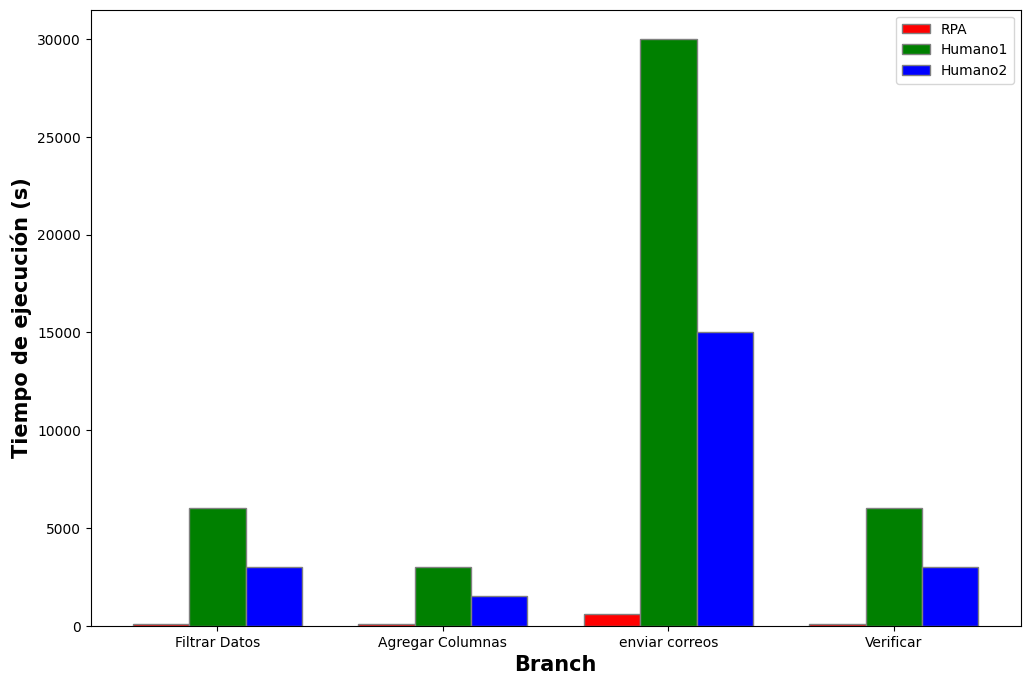

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
RPA = [100,100,600,100]
Humano1 = [6000,3000,30000,6000]
Humano2 = [3000,1500,15000,3000]
# RPA = [12, 30, 1, 8, 22]
# Humano1 = [28, 6, 16, 5, 10]
# Humano2 = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(Humano1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, RPA, color ='r', width = barWidth,
		edgecolor ='grey', label ='RPA')
plt.bar(br2, Humano1, color ='g', width = barWidth,
		edgecolor ='grey', label ='Humano1')
plt.bar(br3, Humano2, color ='b', width = barWidth,
		edgecolor ='grey', label ='Humano2')

# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Tiempo de ejecución (s)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(RPA))],
		['Filtrar Datos', 'Agregar Columnas', 'enviar correos', 'Verificar'])

plt.legend()
plt.show()
